### _Approximate Pereceptron Learning with Linearly Seperable Data_

In [13]:
# Importing Libraries

using Plots
using LinearAlgebra

In [14]:
# Importing Data

X = [[rand(-10:10), rand(-10:10)] for _ in 1:20]
Y = [rand(0:1) for _ in 1:20]

N = length(X)                                                 # Number of datapoints
n = length(X[1])                                              # Dimension of a datapoint

2

In [15]:
# Data Pre-processing

class_0 = []          # Class 0 points
class_1 = []          # Class 1 points

for i in 1:N
   if Y[i] == 0
        push!(class_0, X[i])
    else
        push!(class_1, X[i])
    end
end

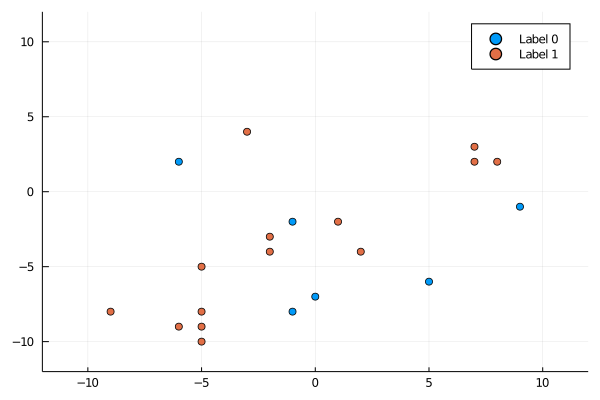

In [16]:
# Plotting

scatter(first.(class_0), last.(class_0), xlim=(-12,12), ylim=(-12,12), label="Label 0")
scatter!(first.(class_1), last.(class_1), label="Label 1")

In [17]:
# Perceptron Learning Algorithm

w = [rand() for _ in 1:n+1]               # Initial w vector
# println(w)

converged = false

while !converged
    
   converged = true
    
    for _x in class_0
        x = copy(_x)
        append!(x, 1)
        
        if dot(w, x) >= 0
            w = w - x 
            converged = false
            break
        end
    end
    
    if converged
        for _x in class_1
            x = copy(_x)
            append!(x, 1)
            if dot(w, x) < 0
                w = w + x
                converged = false
                break
            end
        end
    end
    
    _count = 0
    
    for _x in class_0
        x = copy(_x)
        append!(x, 1)
        
        if dot(w, x) < 0
            _count += 1
        end
    end
    
    for _x in class_1
        x = copy(_x)
        append!(x, 1)
        
        if dot(w, x) >= 0
            _count += 1
        end
    end
    
    if _count / n >= 0.9                                     # Perceptron with 90% accuracy
        break
    end
    
end


println(w)

[-4.182218002471707, 6.771036081833638, -0.0038733894140445813]


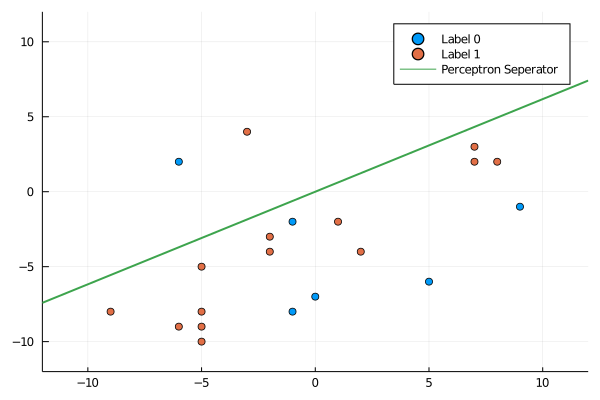

In [18]:
# Plotting

scatter(first.(class_0), last.(class_0), xlim=(-12,12), ylim=(-12,12), label="Label 0")
scatter!(first.(class_1), last.(class_1), label="Label 1")
plot!(x -> x, x -> -(w[1]x + w[3]) / w[2], -12, 12, label="Perceptron Seperator", line=:2)

In [7]:
# Predicting classes of testpoints

T = [[1,2], [3,5], [7,8]]

class_0_test = []
class_1_test = []

for _x in T
    x = copy(_x)
    append!(x, 1)
    
    if dot(w, x) >= 0
        push!(class_1_test, _x)
    else
        push!(class_0_test, _x)
    end
end

println(class_0_test)
println(class_1_test)

Any[[1, 2], [3, 5], [7, 8]]
Any[]


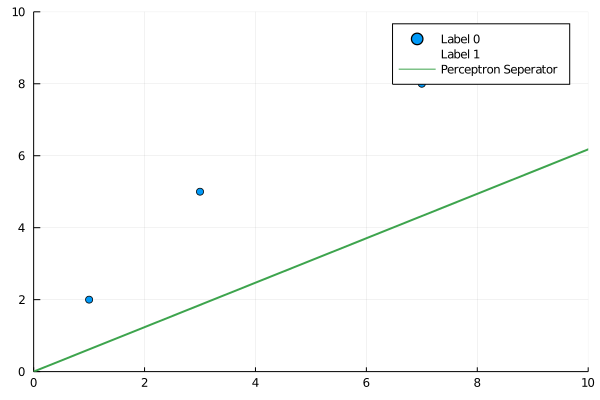

In [19]:
# Plotting testpoints

scatter(first.(class_0_test), last.(class_0_test), xlim=(0,10), ylim=(0,10), label="Label 0")
scatter!(first.(class_1_test), last.(class_1_test), label="Label 1")
plot!(x -> x, x -> -(w[1]x + w[3]) / w[2], -12, 12, label="Perceptron Seperator", line=:2)